In [6]:
import requests

from io import BytesIO as Bytes
from openai import OpenAI
from PIL import Image

from env import OPENAI_API_KEY

client = OpenAI(api_key=OPENAI_API_KEY)

In [3]:
generated = client.images.generate(
  model="dall-e-2",
  prompt="A picture of an anthropomorphic egg smoking a cigarette in the 1940s",
  size="512x512",
  n=1
)

print(generated)

ImagesResponse(created=1738821230, data=[Image(b64_json=None, revised_prompt=None, url='https://oaidalleapiprodscus.blob.core.windows.net/private/org-zZfrMc7ujifmqeG5zEKfI6Ln/user-G8iDcF5tQjxBnYxCFcWEqCaj/img-72crlRher64Xg9kWcmsALlWM.png?st=2025-02-06T04%3A53%3A50Z&se=2025-02-06T06%3A53%3A50Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=d505667d-d6c1-4a0a-bac7-5c84a87759f8&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2025-02-06T00%3A31%3A40Z&ske=2025-02-07T00%3A31%3A40Z&sks=b&skv=2024-08-04&sig=z2aImfgDWQt1WQrfv/p9PFGEOT%2Bz5Hlbl/yB%2BI4pQEo%3D')])


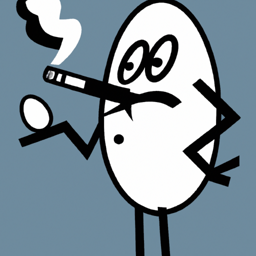

In [9]:
img_url = generated.data[0].url
response = requests.get(img_url)
if response.status_code == 200:
  img = Image.open(Bytes(response.content))
  img.thumbnail((256,256))

display(img)